In [1]:
from dwave.system import EmbeddingComposite, DWaveSampler,DWaveCliqueSampler
from dwave.system.composites import LazyFixedEmbeddingComposite
from dwave.system.composites import FixedEmbeddingComposite
from minorminer import find_embedding
from dwave.embedding.chimera import find_clique_embedding
import numpy as np
import os
import dimod
import time
import math
import requests
from scipy.io import savemat
import json
import datetime 
import scipy.io
from minorminer import busclique
import dwave_networkx as dnx
from sympy import *
import dwave.inspector
import pickle

In [2]:
H=scipy.io.loadmat("H(32BPSK)")
H=H['h']
Y=scipy.io.loadmat("Y(32BPSK)")
Y=Y['Y']
M=scipy.io.loadmat("msg(32BPSK)")
M=M['m']



In [3]:
H=scipy.io.loadmat("H(32BPSK)1")
H=H['h']
Y=scipy.io.loadmat("Y(32BPSK)1")
Y=Y['Y']
M1=scipy.io.loadmat("msg(32BPSK)1")
M1=M1['m']

In [2]:
H=scipy.io.loadmat("H(32BPSK)2")
H=H['h']
Y=scipy.io.loadmat("Y(32BPSK)2")
Y=Y['Y']
M2=scipy.io.loadmat("msg(32BPSK)2")
M2=M2['m']

In [3]:
N=len(H[0])
print(N)

32


In [4]:
HI=np.zeros((N,N))
HQ=np.zeros((N,N))
YI=np.zeros((N,1))
YQ=np.zeros((N,1))

In [5]:
def OptProblem(H,Y):
    
    
    t=0    
    h={}
    J={}
    for i in range(N):
        for j in range(N):

            HI[i,j]=np.real(H[i,j])
       
    for i in range(N):
        for j in range(N):
            HQ[i,j]=np.imag(H[i,j])
       
    for i in range(N):

        YI[i]=np.real(Y[i])

    for i in range(N):

        YQ[i]=np.imag(Y[i])

    for i in range(1,N+1):

        t=-2*np.dot(HI[:,i-1],YI)-2*np.dot(HQ[:,i-1],YQ)
        h[f'{i}']=t[0]

    for i in range(1,N+1):
        for j in range(i+1,N+1):
            t=2*np.dot(HI[:,i-1],HI[:,j-1])+2*np.dot(HQ[:,i-1],HQ[:,j-1])
            J[(f'{i}',f'{j}')]=t
    
    
    
    return h,J

In [7]:
print(len(H)/32)

80000.0


In [6]:
#h,j=OptProblem(H[32*t[2]:32*t[2]+32],Y[32*t[2]:32*t[2]+32])
anneal_time = 15
pause_duration = 1      # Must be greater than 0
pause_start = 0.3   
schedule=[[0.0,0.0],[pause_start*anneal_time,pause_start],[pause_start*anneal_time+pause_duration, pause_start],[anneal_time+pause_duration, 1.0]]

In [33]:
test=[]
x1=51
x=0

In [34]:
dwave_sampler=DWaveCliqueSampler(token='DEV-17e676e9887fab8e59f58d606b274efb7bd330b2', endpoint='https://cloud.dwavesys.com/sapi/', solver={'topology__type': 'pegasus'})
for i in range(x1,52):
    x1=i
    
    avg=0
    for k in range(x,100):
        x=k
        
        #pause_start =i/10
        anneal_time=15
        #pause_duration =  i/10
        
        schedule=[[0.0,0.0],[pause_start*anneal_time,pause_start],[pause_start*anneal_time+pause_duration, pause_start],[anneal_time+pause_duration, 1.0]]
        sampleset = dwave_sampler.sample_ising(h,j,anneal_schedule=schedule,num_reads = 1000,chain_strength=52)
        avg+=sampleset.first.num_occurrences
    test.append(avg//100)
    avg=0
    x=0

In [35]:
print(test)
x1=16
#h,j=OptProblem(H[20000:20000+32],Y[20000:20000+32])

[324]


In [32]:
h,j=OptProblem(H[32*t[3]:32*t[3]+32],Y[32*t[3]:32*t[3]+32])
dwave_sampler=DWaveCliqueSampler(token='DEV-857b7f712b60ce91f5ebbe9790b75fcb8ad22854', endpoint='https://cloud.dwavesys.com/sapi/', solver={'topology__type': 'pegasus'})
sampleset = dwave_sampler.sample_ising(h,j,anneal_schedule=schedule,num_reads = 1000,chain_strength=51)
print(sampleset)

    1 10 11 12 13 14 15 16 17 18 19  2 20 21 22 ...  9       energy num_oc. ...
0  +1 +1 -1 +1 +1 -1 +1 -1 -1 +1 +1 +1 +1 +1 -1 ... +1 -2245.053132     912 ...
1  +1 +1 -1 +1 +1 -1 +1 -1 -1 +1 +1 +1 +1 +1 -1 ... +1 -2245.053132      49 ...
2  +1 +1 -1 +1 +1 -1 +1 -1 -1 +1 +1 +1 +1 +1 -1 ... +1 -2245.053132       1 ...
4  +1 +1 -1 +1 +1 -1 +1 -1 -1 +1 +1 +1 +1 +1 -1 ... +1 -2245.053132       1 ...
7  +1 +1 -1 +1 +1 -1 +1 -1 -1 +1 +1 +1 +1 +1 -1 ... +1 -2245.053132       1 ...
6  +1 +1 -1 +1 +1 -1 +1 -1 -1 +1 +1 +1 +1 +1 -1 ... +1  -2169.46707       1 ...
3  +1 +1 -1 +1 +1 -1 +1 -1 -1 +1 +1 -1 +1 +1 -1 ... +1 -2140.820798      25 ...
5  +1 +1 -1 +1 +1 -1 +1 -1 -1 +1 +1 -1 +1 +1 -1 ... +1 -2140.820798       2 ...
9  +1 +1 -1 +1 +1 -1 +1 -1 -1 +1 +1 +1 +1 +1 -1 ... +1 -2137.197276       1 ...
10 +1 +1 -1 +1 +1 -1 +1 -1 -1 +1 +1 +1 +1 +1 -1 ... +1 -2123.354724       1 ...
11 +1 +1 -1 +1 +1 -1 +1 -1 -1 +1 +1 +1 +1 +1 -1 ... +1 -2123.354724       2 ...
12 +1 +1 -1 +1 +1 -1 +1 -1 -1 +1 +1 +1 +

In [20]:
with open('2BPSK1.pickle', 'rb') as handle:
    h = pickle.load(handle)
with open('2BPSK2.pickle', 'rb') as handle:
    j = pickle.load(handle)
print(h,j)

{'0': -7.93446095565484, '1': -18.265102270156873} {('0', '1'): -2.4501833026160544}


In [18]:
count1=0
count2=32*len(s2)
#s2=[]

In [7]:
t=[0]
sm=0
for i in range(4):
    sm+=20000
    t.append(sm)
    
    
print(t)

[0, 20000, 40000, 60000, 80000]


In [13]:
dwave_sampler=DWaveCliqueSampler(token='DEV-8fce401a913a0806637bd23cb5acc7b0f43d4a12', endpoint='https://cloud.dwavesys.com/sapi/', solver={'topology__type': 'pegasus'})
h,j=OptProblem(H[0:32],Y[0:32])
sampleset = dwave_sampler.sample_ising(h,j,anneal_schedule=schedule,num_reads = 400,chain_strength=62)

In [ ]:
#c=0
#dwave_sampler=DWaveCliqueSampler(token='DEV-be236b7a9a68a3c7d54b5f5338dcac3019a4005f', endpoint='https://cloud.dwavesys.com/sapi/', solver={'topology__type': 'pegasus'})
for l in range(count1,2):
    count1=l
    for i in range(count2,32*t[count1+1]):
        
        if i%32!=0:
            continue
        count2=i
        h,j=OptProblem(H[i:i+32],Y[i:i+32])

        #Q=Qubo(H[i:i+2],Y[i:i+2])
        sampleset = dwave_sampler.sample_ising(h,j,anneal_schedule=schedule,num_reads = 400,chain_strength=51)
        #sampleset=dimod.ExactSolver().sample_ising(h,j)
        tmp=sampleset.first.sample
        
        for k in range(1,len(tmp)+1):
            
            if tmp[f'{k}']==-1:
                tmp[f'{k}']=0
                    
        s2.append(tmp)
        #print(sampleset.first.num_occurrences)
        c+=1
        if c==720:
            dwave_sampler=DWaveCliqueSampler(token=tok[0], endpoint='https://cloud.dwavesys.com/sapi/', solver={'topology__type': 'pegasus'})
            del tok[0]
            print(len(tok))
            c=0
            
        if i%32000==0:
            with open('s(32BPSK)2.pickle', 'wb') as handle:
                
                pickle.dump(s2, handle, protocol=pickle.HIGHEST_PROTOCOL)
            print(i)
    count2=32*t[count1+1] 
    
    #print(sampleset.first.sample)

In [17]:
#s=s[0:20000]
print(len(s2))
#print(len(tok))
#print(count1)
#s=[]

1


In [9]:
import os
size=os.path.getsize("s2(32BPSK).pickle")
print(size)

458826


In [15]:

with open('s(32BPSK)2.pickle', 'wb') as handle:
    pickle.dump(s, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [12]:
with open('s(32BPSK)2.pickle', 'rb') as handle:
    s2 = pickle.load(handle)

EOFError: Ran out of input

In [57]:
for i in range(len(s)):
    if s[i]['0']==-1:
        s[i]['0']=0
    if s[i]['1']==-1:
        s[i]['1']=0

In [25]:
print(t)

[0, 20000, 40000, 60000, 80000]


In [15]:
e=0
er=[]
for i in range(80000):
    for j in range(1,33):
        if s[i][f'{j}']!=M1[j-1][i]:
            e+=1
   
        
    if i+1 in t:
        er.append(e/(32*20000))
        print(e)
        e=0
#er.append(e/(2*c[len(c)-1]))
print(er)

66026
241
0
0
[0.103165625, 0.0003765625, 0.0, 0.0]


In [24]:
print(er)

4331


In [61]:
ber=[]
for i in range(len(BER)):
    ber.append(BER[i][0])

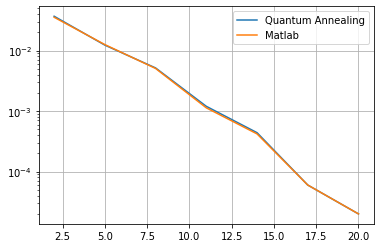

In [62]:
import matplotlib.pyplot as plt
SNR=[2,5,8,11,14,17,20]
plt.semilogy(SNR,er , label='Quantum Annealing')
plt.semilogy(SNR, ber,  label='Matlab')
plt.grid(True)
plt.legend()
plt.show()